### Wine Quality Prediction

### Loading important libraries

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

### Loading wine dataset and data preprocessing

In [41]:
df= pd.read_csv('winequality.csv')
non_zero_df = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
for column in non_zero_df:
    df[column] = df[column].replace(0, np.NaN)# replacing NaN by zero
    mean = int(df[column].mean(skipna = True))
    df[column] = df[column].replace(np.NaN, mean)

In [42]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.216246,0.339273,0.318575,5.444190,0.056024,30.525319,115.744574,0.994697,3.218093,0.530888,10.491801,5.818378
std,1.295779,0.164978,0.145393,4.757399,0.035044,17.749400,56.521855,0.002999,0.160842,0.149351,1.192712,0.873255
min,3.800000,0.000000,0.000000,0.600000,0.000000,1.000000,6.000000,0.987110,2.720000,0.000000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [43]:
df.shape # number of rows and columns

(6497, 13)

In [44]:
df.head(2) #top two rows

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


In [45]:
df.tail(5) #last five rows

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.00,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
6496,red,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [46]:
df.info() #information about the data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [47]:
df.isnull().sum() 

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Data Visualization

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,5)

Text(0.5, 1.0, '"Average Quality by Wine Color"')

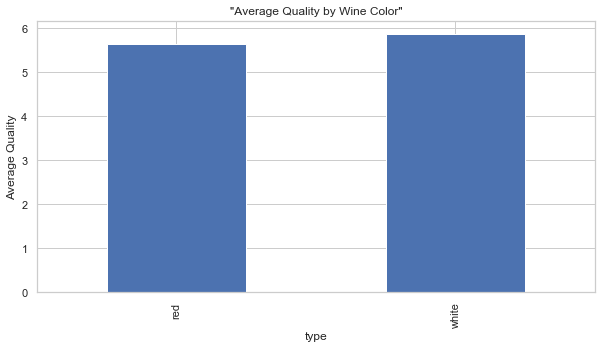

In [49]:
df.groupby('type')['quality'].mean().dropna().plot(kind='bar') #plotting average quality by alchol type
plt.ylabel('Average Quality')
plt.title('"Average Quality by Wine Color"')

Text(0.5, 1.0, 'rating by wine type')

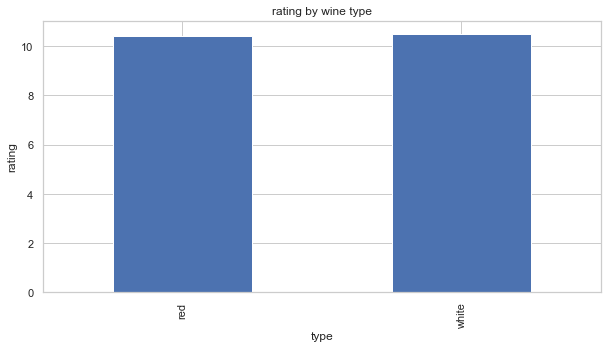

In [50]:
df.groupby('type')['alcohol'].mean().dropna().plot(kind='bar') #plotting rating by alchol type
plt.ylabel('rating')
plt.title('rating by wine type')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1e676b90>,
      dtype=object)

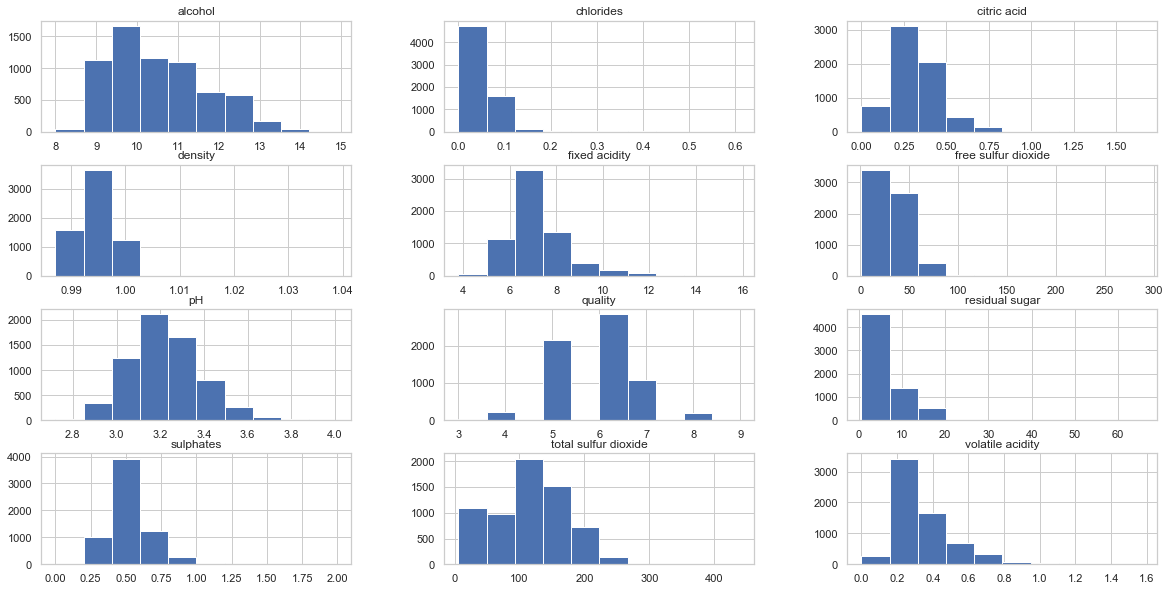

In [51]:
plt.rcParams["figure.figsize"] = (20,10)
df.hist()

In [52]:
dataset = df.drop(['type'], axis=1) #dropping the type(string) column to avoid arguement error
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.00,11.2,6
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


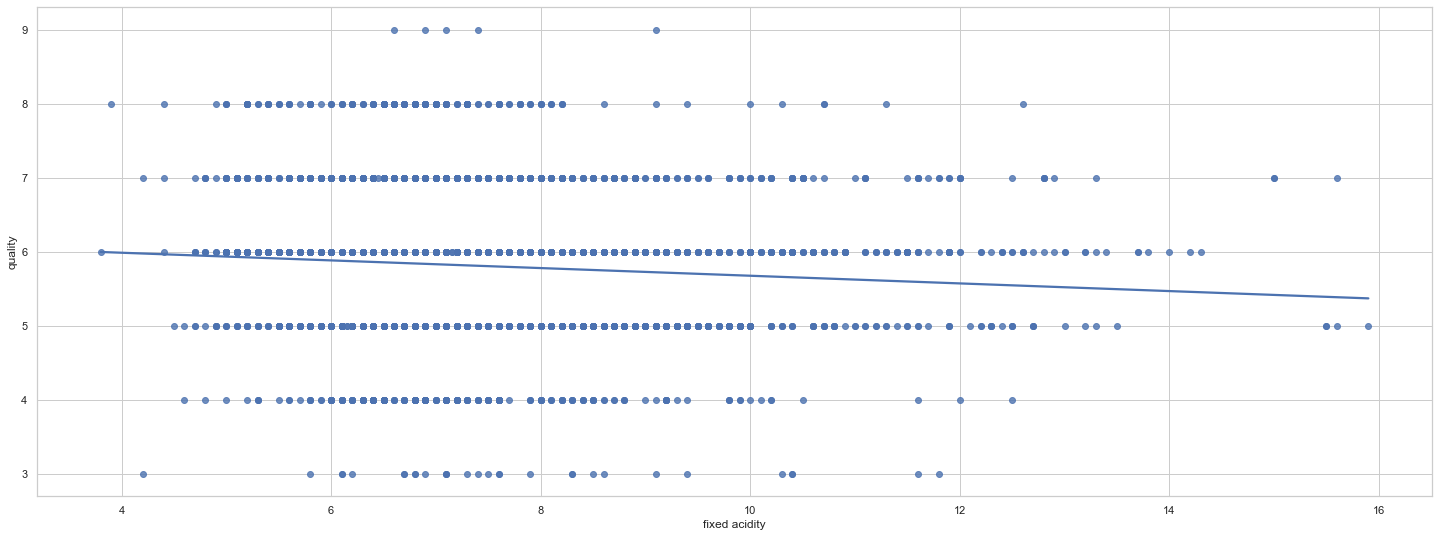

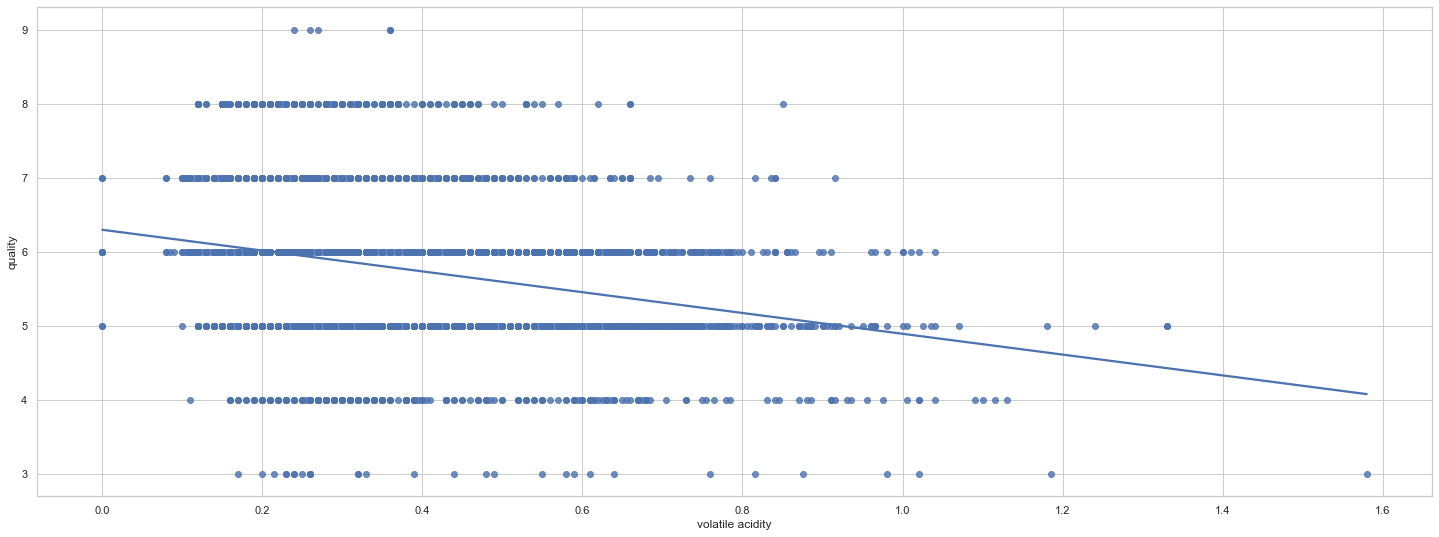

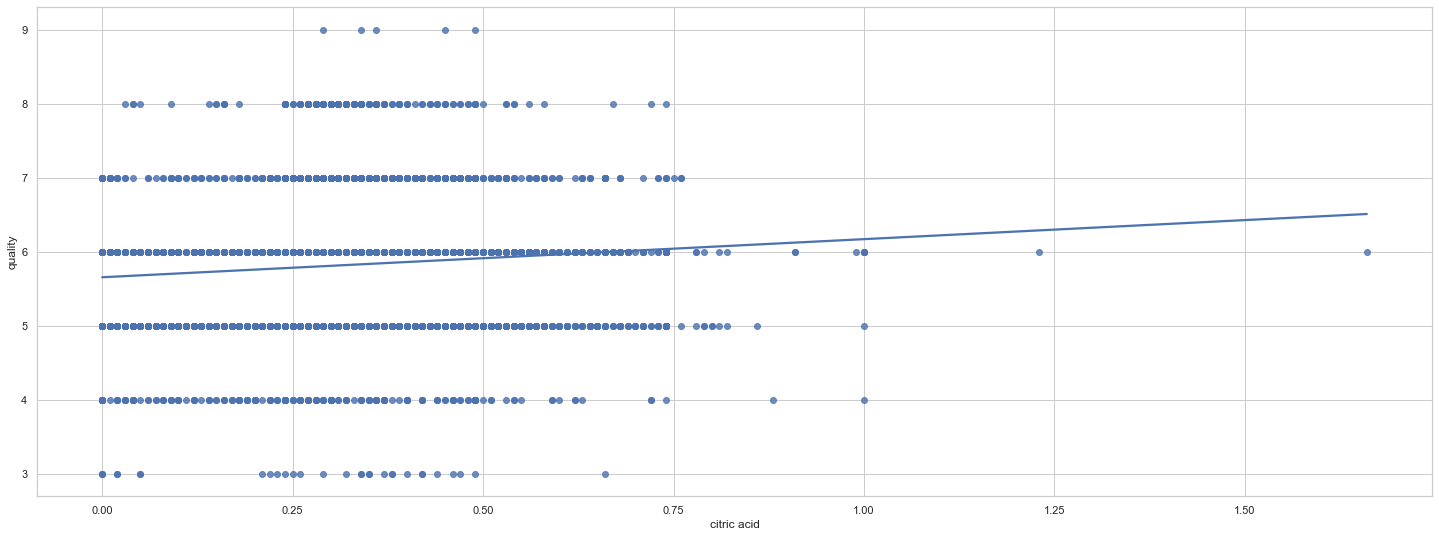

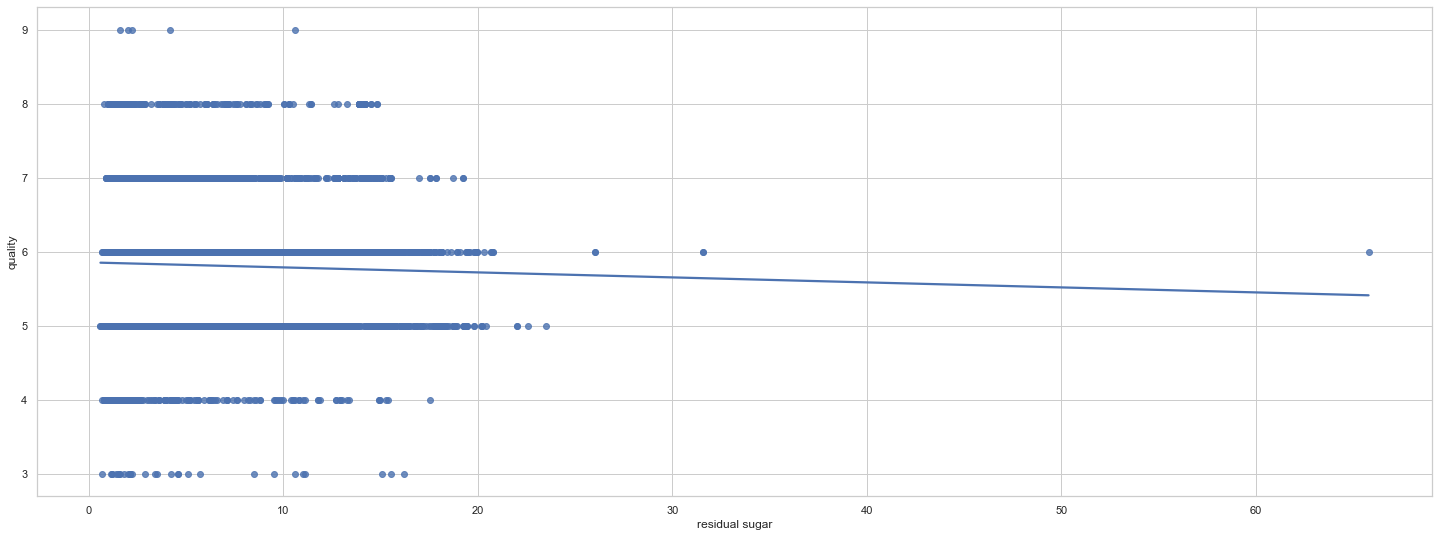

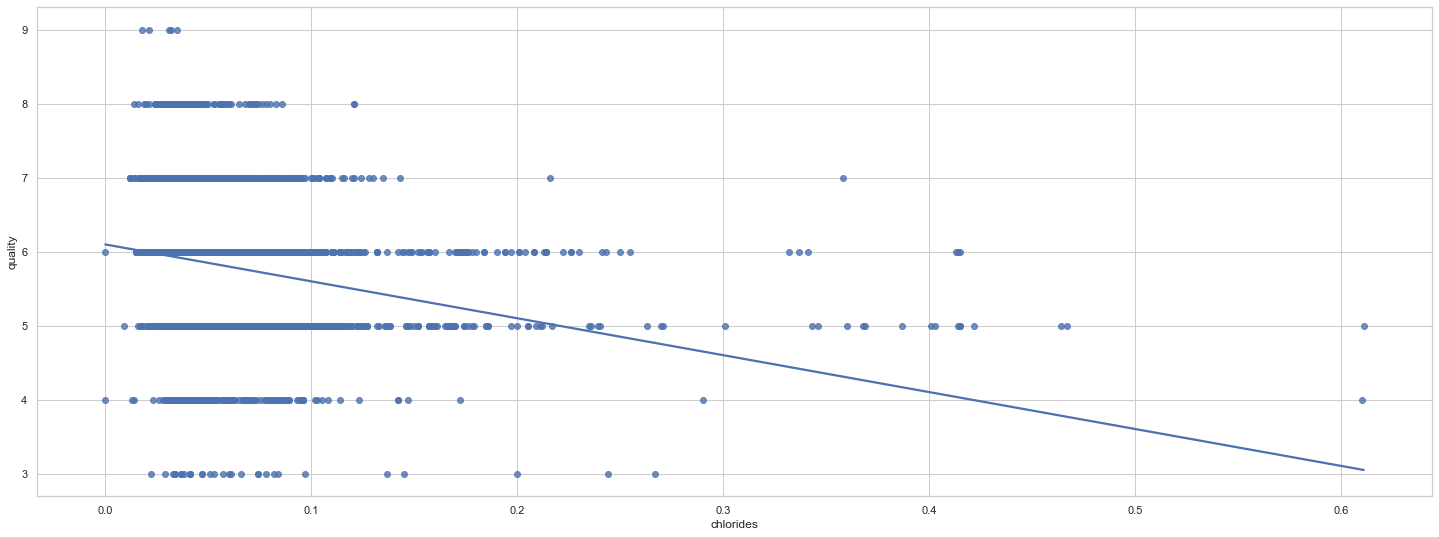

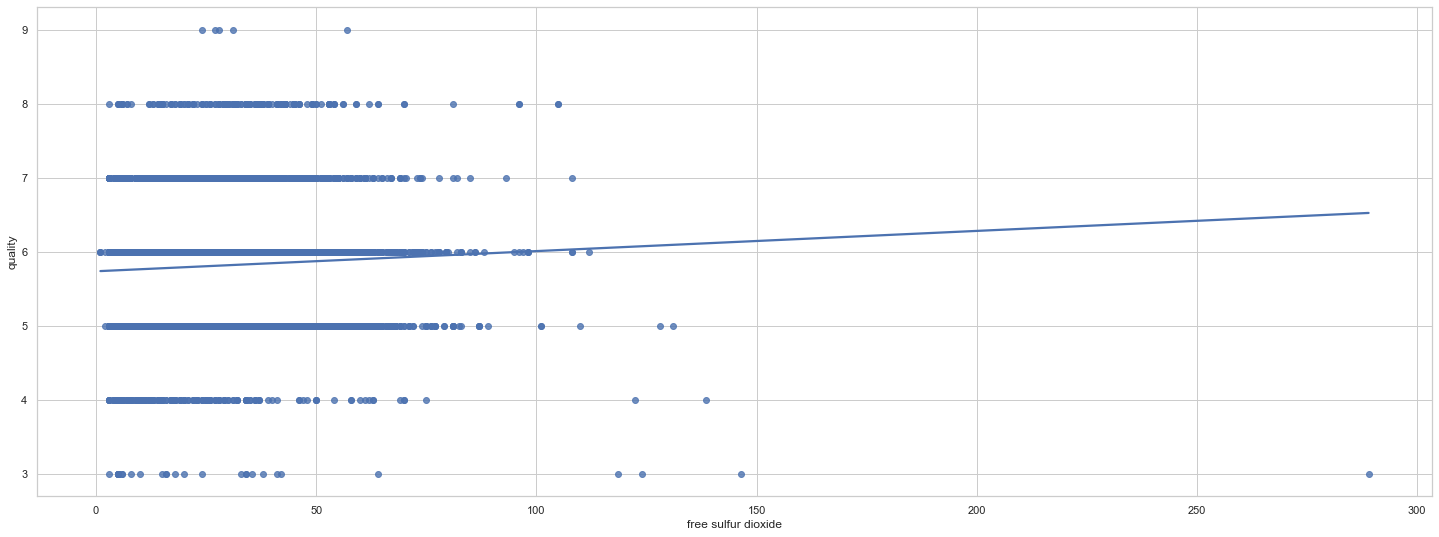

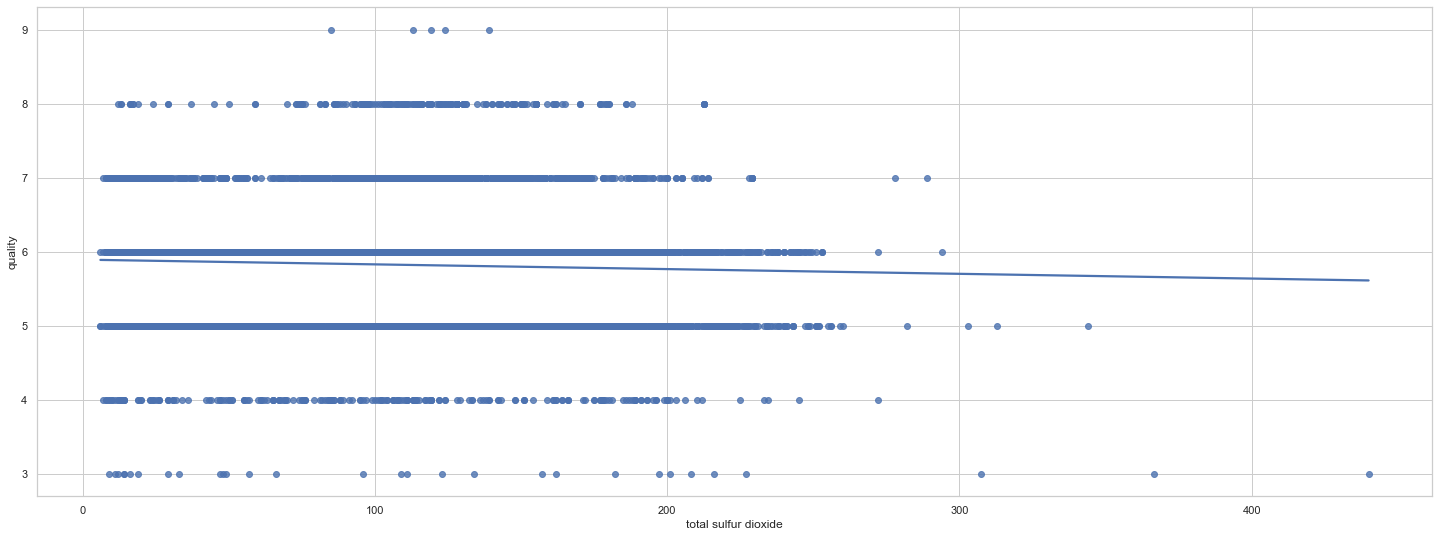

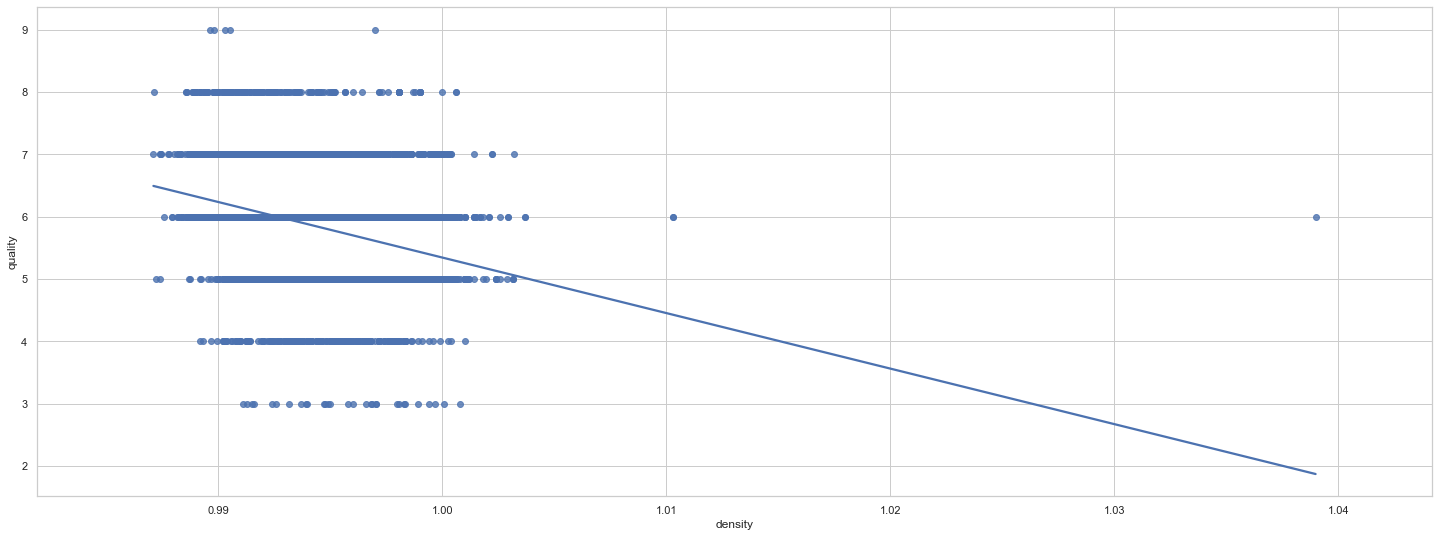

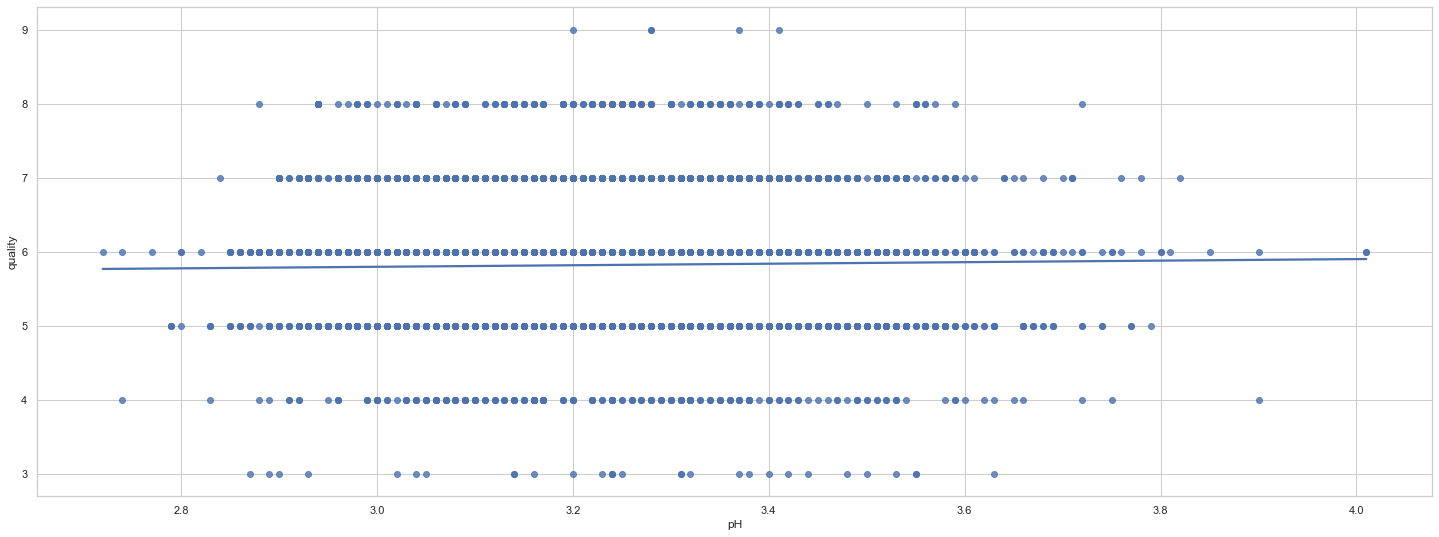

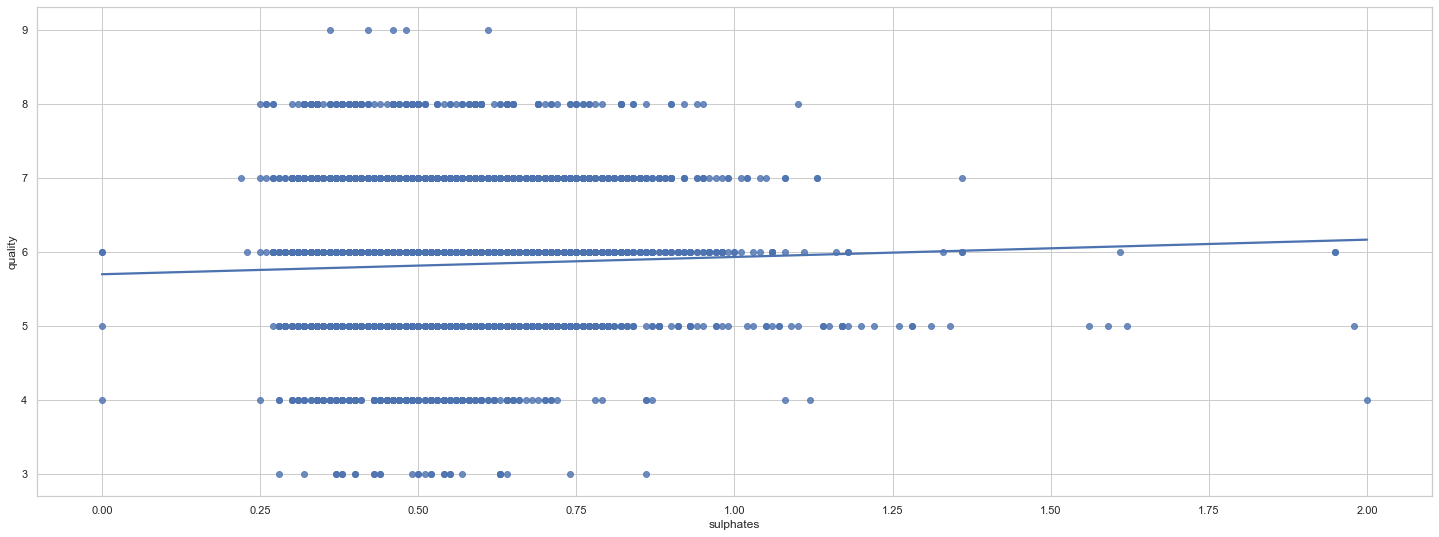

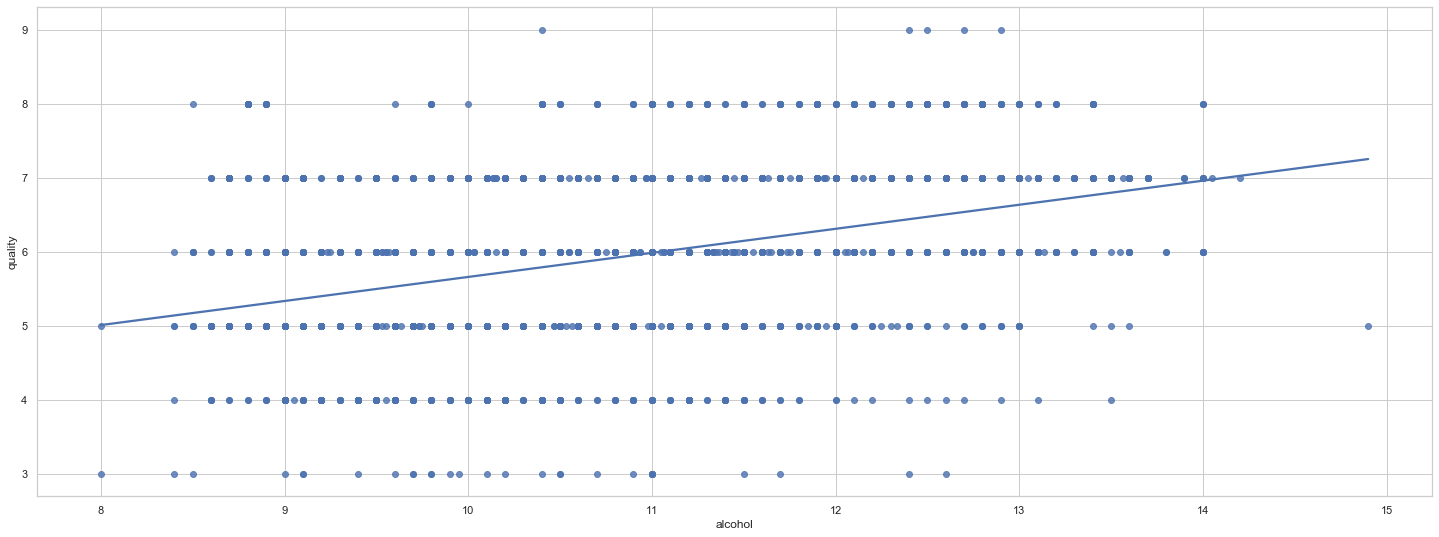

In [53]:
for col in dataset.columns:
    if col!='quality':
         plt.figure(figsize=(25, 9))
         sns.regplot(data=dataset, x=col, y='quality',ci=None,)

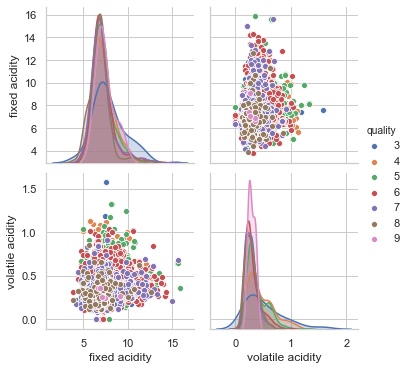

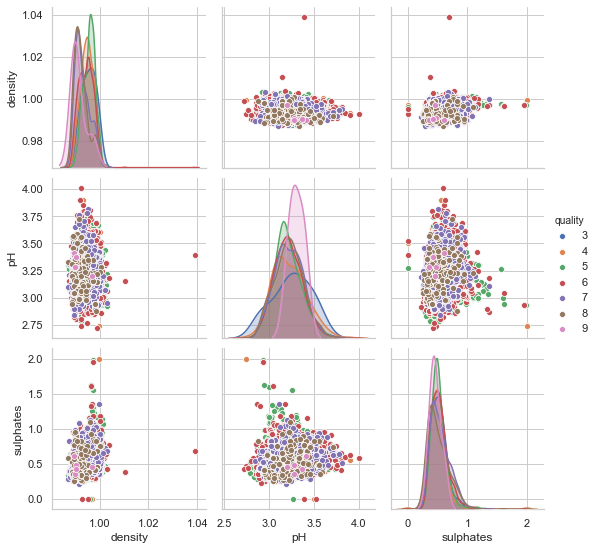

In [54]:
rcParams['figure.figsize'] = 110.7,80.27
sns.set(font_scale=1)
sns.set_style('whitegrid')
grid0 = sns.pairplot(data=df, vars=df.columns[1:3], hue='quality') 
grid = sns.pairplot(data=df, vars=df.columns[8:11], hue='quality')

In [55]:
df['quality'].describe() 

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

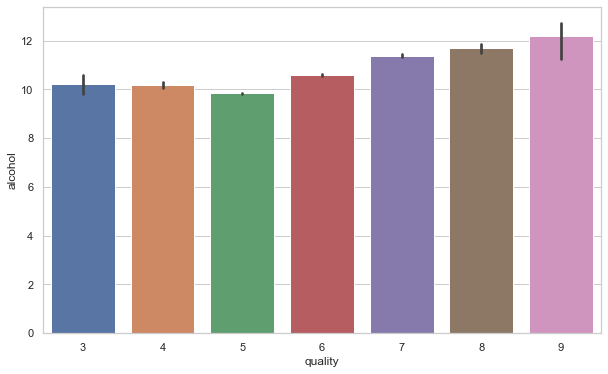

In [56]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = dataset)

### Preprocessing Data before implementation of Machine learning algorithms¶

In [57]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
dataset['quality'] = pd.cut(dataset['quality'], bins = bins, labels = group_names)


In [58]:
#Now lets assign a labels to our quality variable
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
label_quality = LabelEncoder()

In [59]:
dataset['quality'].value_counts()

bad     5220
good    1272
Name: quality, dtype: int64

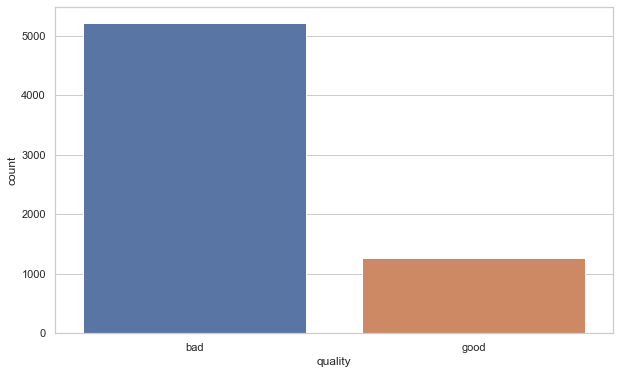

In [60]:
fig = plt.figure(figsize = (10,6))
sns.countplot(dataset['quality'])

In [61]:
#Now seperate the dataset as response variable and feature variabes
X = dataset.drop('quality', axis = 1)
y = dataset['quality']

### Training and testing dataset

In [62]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [63]:
print(f'Shape of training set = {X_train.shape}')
print(f'Shape of testing  set = {X_test.shape}')

Shape of training set = (5197, 11)
Shape of testing  set = (1300, 11)


In [64]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()

In [65]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

### Implementation of ML models
### 1. Random Forest Classifier ML model

In [66]:
rfc = RandomForestClassifier(n_estimators=200)
y_train = y_train.fillna('bad')
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [67]:
#Let's see how our model performed
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

         bad       0.89      0.97      0.93      1047
        good       0.80      0.50      0.62       253

    accuracy                           0.88      1300
   macro avg       0.84      0.74      0.77      1300
weighted avg       0.87      0.88      0.87      1300



### Random forest classifier gives 88% accuracy

### Confusion matrix

In [68]:
#Confusion matrix for the random forest classification
print(confusion_matrix(y_test, pred_rfc))

[[1015   32]
 [ 126  127]]


### 2.Stochastic Gradient Decent Classifier

In [69]:
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)

In [70]:
print(classification_report(y_test, pred_sgd))

              precision    recall  f1-score   support

         bad       0.86      0.89      0.88      1047
        good       0.48      0.42      0.45       253

    accuracy                           0.80      1300
   macro avg       0.67      0.66      0.66      1300
weighted avg       0.79      0.80      0.79      1300



### Stochastic Gradient Decent Classifier  gives 82% accuracy

In [71]:
print(confusion_matrix(y_test, pred_sgd))


[[933 114]
 [147 106]]


### 3. Support vector Classifier

In [72]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)


In [73]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

         bad       0.85      0.97      0.91      1047
        good       0.71      0.28      0.41       253

    accuracy                           0.84      1300
   macro avg       0.78      0.63      0.66      1300
weighted avg       0.82      0.84      0.81      1300



### Support Vector classifier gives 84% accuracy

### To increase the accuracy of models

### Grid Search CV

In [74]:
#Finding best parameters for our SVC model
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=5)

In [75]:
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [37]:
grid_svc.best_params_

{'C': 1.3, 'gamma': 1.4, 'kernel': 'rbf'}

In [38]:
#Let's run our SVC again with the best parameters.
svc2 = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))

              precision    recall  f1-score   support

         bad       0.88      0.96      0.92      1047
        good       0.75      0.45      0.56       253

    accuracy                           0.86      1300
   macro avg       0.81      0.71      0.74      1300
weighted avg       0.85      0.86      0.85      1300



### SVC accuracy improves from 81% to 86% using Grid Search CV

### Cross validation score for Random Forest Classifier 

In [39]:
#Now lets try to do some evaluation for random forest model using cross validation.
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
rfc_eval.mean()

0.8889680598784644